# Text Embedding

# 0- Basic

In [4]:
import openai
# use the ollama command line tool to run the model locally
client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)


In [5]:
# Function to get the embedding of a text using the bge-m3 model
# The function returns the embedding data for the input text.

def get_embedding(text, dimentions=1531, model="bge-m3"): 
   # This function takes a text input, replaces newlines with spaces
   #  Uses the OpenAI client to create an embedding with specified dimensions and model. 
   # Whille dimensions do not apply when using ollama.
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding


In [3]:
# embedding vector is constructed based on the word's context within a large corpus of text

vector = get_embedding("Hello world", dimentions=10)
print(vector)
print(len (vector))


[-0.03997899, 0.032039504, -0.028340528, 0.024689702, -0.033173516, -0.04172549, -0.057005398, -0.04284784, 0.008328232, -0.0011948223, -0.009015081, 0.013715527, 0.028566962, -0.013108751, 0.022261515, 0.00038081274, 0.026278047, -0.027508201, -0.030898778, -0.03414061, -0.04422271, -0.010187023, 0.018449556, -0.025886478, 0.01228798, 0.05796398, -0.035379015, 0.000114684786, -0.00022345223, -0.055280942, 0.04247789, 0.077805884, -0.010501146, -0.04487383, -0.023816705, -0.03326165, -0.003885886, -0.006547394, -0.060271177, 0.01854893, 0.006558472, 0.018999822, 0.018195638, -0.061131492, 0.005732627, -0.0501424, -0.046270862, -0.0038999014, 0.0058512334, -0.06397852, 0.0178738, 0.026687808, 0.03153747, -0.003930828, 0.003851672, 0.022274284, -0.016074046, -0.02247339, -0.057515867, -0.00917562, -0.020869123, -0.0026854218, -0.0029436173, -0.00234307, 0.0017674221, 0.16394216, 0.03163366, -0.02564187, -0.007811445, -0.013362453, -0.020732613, -0.005719802, -0.0080208285, 0.023064123, -

In [6]:
# print the first 10 values of the vector to verify the output
print("First 10 values:", vector[:10])

First 10 values: [-0.03997899, 0.032039504, -0.028340528, 0.024689702, -0.033173516, -0.04172549, -0.057005398, -0.04284784, 0.008328232, -0.0011948223]


In [7]:
# Sentence as a vector typically involves combining the embeddings of individual words in the sentence

vector1 = get_embedding("My name is Hamed")
print(vector1)
len(vector1)
print("First 10 values:", vector1[:10])

[0.009319987, -0.014272541, -0.021383429, -0.0060022483, -0.013947216, -0.03584477, -0.004501127, -0.01322217, -0.023046914, 0.016652102, -0.029379373, 0.010520959, -0.048811685, -0.029954957, 0.011549028, 0.014638809, 0.06758104, -0.03797031, -0.00895743, -0.012800274, -0.01724117, 0.020636695, 0.039170064, -0.0012370443, 0.049176052, 0.054315623, -0.015873458, -0.02156694, 0.002098707, -0.026363801, 0.015557175, 0.0071728, 0.00439933, -0.057933528, -0.027824543, -0.04363751, 8.432912e-05, -0.015437555, -0.037470516, 0.0004607271, -0.025679775, -0.0018153234, 0.028151907, 0.0023310154, 0.036287043, -0.020171162, -0.021401696, -0.0059183654, -0.01502959, 0.04004684, 0.019710269, -0.012555109, 0.030006323, 0.028980333, -0.0014482983, 0.01668698, -0.0137026515, 0.0026960592, -0.013997349, -0.041527737, 0.01503399, 0.066317685, 0.011909174, 0.011819635, 0.002834835, 0.11470036, 0.03154145, -0.017647436, -0.023748497, -0.03738539, -0.038079247, 0.010296241, -0.027664581, -0.021986514, -0.0

# 1- generate-embeddig

In [8]:
import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)


In [9]:
# https://www.kaggle.com/
# We use a dataset of Amazon reviews

import pandas as pd

# load & inspect dataset
input_datapath = "../data/reviews.csv"  
df = pd.read_csv(input_datapath, index_col=0, delimiter=";")
df = df[["ProductId", "Score", "Text"]]
df = df.dropna()
df.head(2)

,ProductId,Score,Text
Id,,,
1,B001E4KFG0,5,I have bought several of the Vitality canned d...
2,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...


In [10]:
import tiktoken
embedding_encoding = "cl100k_base" #There are other encodings available like BPE, P50K, SentencePiece, etc.
# The encoding used is cl100k_base that is often associated with models like GPT-3.5 and GPT-4.
# This encoding is designed to handle a wide range of text inputs efficiently.
max_tokens = 8000  # the maximum for deepseek is 4096, but we use a larger value to be safe
encoding = tiktoken.get_encoding(embedding_encoding)

# omit reviews that are too long to embed
# The function encodes the text and calculates the number of tokens.
df["n_tokens"] = df.Text.apply(lambda x: len(encoding.encode(x)))
# The number of tokens is then compared to the maximum allowed tokens (max_tokens).
df = df[df.n_tokens <= max_tokens].tail(30)
len(df)

30

In [11]:
# Get embeddings and save them for future reuse
# The function get_embedding is applied to each review in the DataFrame.
df["embedding"] = df.Text.apply(lambda x: get_embedding(x, dimentions=100))

In [12]:
# Save the DataFrame with embeddings to a CSV file
df.to_csv("./data/reviews_with_embeddings_30.csv", sep=";")

# 2-visualization

In [13]:
import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)

def get_embedding(text, dimentions=1531, model="bge-m3"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding

In [14]:
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"


in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"


in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!" 


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [15]:
import numpy as np

embeddings = []
for input_text in input_text_lst_news:
    embeddings.append(get_embedding(input_text))
    
embeddings_array = np.array(embeddings) 
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 1024)
[[-0.05174608 -0.04718262 -0.03109954 ... -0.0393917  -0.03738141
   0.00990993]
 [-0.02559954 -0.0040733  -0.09923697 ...  0.00465854 -0.0380248
  -0.03475099]
 [-0.01589432 -0.01812308 -0.05901576 ... -0.01357415 -0.03173063
  -0.01383671]
 ...
 [-0.03729887 -0.01985742 -0.03135947 ... -0.02049829 -0.02095995
   0.01489856]
 [-0.06554242 -0.024203   -0.03066065 ...  0.00640881 -0.0400099
   0.00538443]
 [-0.06072358 -0.01250506 -0.03665663 ...  0.007449    0.00780043
   0.03890256]]


In [16]:
#### Reduce embeddings from 768 to 2 dimensions for visualization
# - We'll use principal component analysis (PCA).

from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[ 0.55918226 -0.12484283]
 [ 0.45838465 -0.02565025]
 [ 0.29132069  0.11590434]
 [-0.33466194  0.40798851]
 [-0.26196957  0.39777731]
 [-0.27487612 -0.30000149]
 [-0.43737998 -0.47117559]]


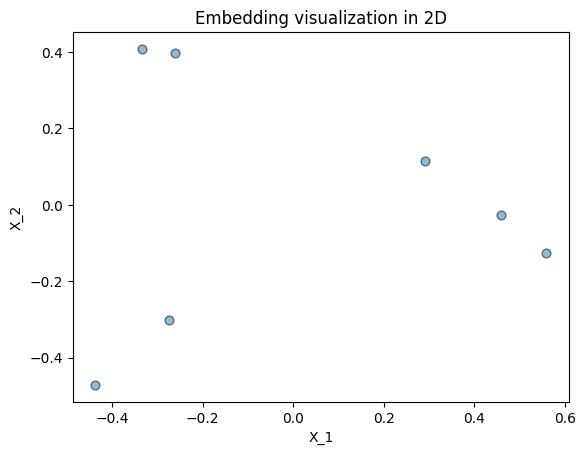

In [17]:
import matplotlib.pyplot as plt
import mplcursors
# The mplcursors library is used to create interactive data visualizations in Matplotlib.
def plot_2D(x_values, y_values, labels):

    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha=0.5,
                         edgecolors='k',
                         s=40)

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    # aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5)  # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()


plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

array([[-0.05174608, -0.04718262, -0.03109954, ..., -0.0393917 ,
        -0.03738141,  0.00990993],
       [-0.02559954, -0.0040733 , -0.09923697, ...,  0.00465854,
        -0.0380248 , -0.03475099],
       [-0.01589432, -0.01812308, -0.05901576, ..., -0.01357415,
        -0.03173063, -0.01383671],
       ...,
       [-0.03729887, -0.01985742, -0.03135947, ..., -0.02049829,
        -0.02095995,  0.01489856],
       [-0.06554242, -0.024203  , -0.03066065, ...,  0.00640881,
        -0.0400099 ,  0.00538443],
       [-0.06072358, -0.01250506, -0.03665663, ...,  0.007449  ,
         0.00780043,  0.03890256]], shape=(7, 1024))

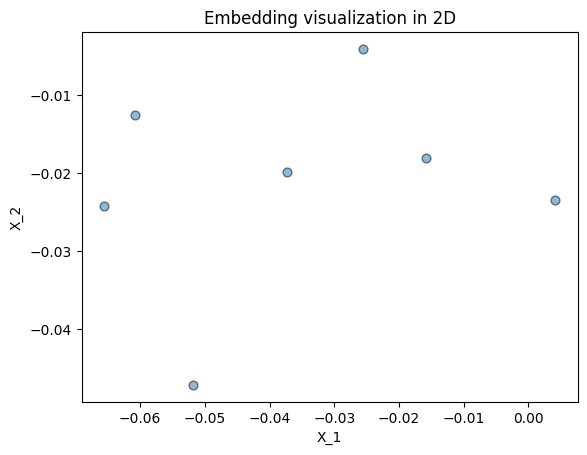

In [18]:
# Reduce the dimentions during embedding generation
# As dimensions do not apply when using ollama, we can use the same function to generate 2D embeddings.
# So use this part when you use openai API key
embeddings = []
for input_text in input_text_lst_news:
    embeddings.append(get_embedding(input_text, dimentions=2))
    
embeddings_array = np.array(embeddings) 

display(embeddings_array)

# We expect that the accuracy should drop
# The embeddings should be less accurate, but the visualization should be similar.
plot_2D(embeddings_array[:,0], embeddings_array[:,1], input_text_lst_news)

# 3-clustering

In [19]:
import os
import tiktoken

from openai import OpenAI

import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)

def get_embedding(text, dimentions=1531, model="bge-m3"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding


import pandas as pd

# load & inspect dataset
input_datapath = "../data/reviews.csv"  # to save space, we provide a pre-filtered dataset
df = pd.read_csv(input_datapath, index_col=0, delimiter=";")
df = df[["ProductId", "Score", "Text"]]
df = df.dropna()
df.head(2)
df.shape, df

((37, 3),
      ProductId  Score                                               Text
 Id                                                                      
 1   B001E4KFG0      5  I have bought several of the Vitality canned d...
 2   B00813GRG4      1  Product arrived labeled as Jumbo Salted Peanut...
 3   B000LQOCH0      4  This is a confection that has been around a fe...
 4   B000UA0QIQ      2  If you are looking for the secret ingredient i...
 5   B006K2ZZ7K      5  Great taffy at a great price.  There was a wid...
 6   B006K2ZZ7K      4  I got a wild hair for taffy and ordered this f...
 7   B006K2ZZ7K      5  This saltwater taffy had great flavors and was...
 8   B006K2ZZ7K      5  This taffy is so good.  It is very soft and ch...
 9   B000E7L2R4      5  Right now I'm mostly just sprouting this so my...
 10  B00171APVA      5  This is a very healthy dog food. Good for thei...
 11  B0001PB9FE      5  I don't know if it's the cactus or the tequila...
 12  B0009XLVG0      5  One 

In [20]:

import numpy as np
dimentions = 3584
#dimentions = 100
embedding_array = np.empty((0, dimentions))

for index, row in df.iterrows():
    embedding_array = np.append(embedding_array, [get_embedding(row['Text'], dimentions=dimentions)], axis=0) 

'''
dimentions = 3584
embedding_list = []

for index, row in df.iterrows():
    embedding = get_embedding(row['Text'], dimentions=dimentions)
    embedding_list.append(embedding)

# Convert the list of embeddings to a NumPy array
# The embedding_list is a list of lists, where each inner list is an embedding vector.
embedding_array = np.array(embedding_list)
'''


print(embedding_array.shape)
display(embedding_array)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, 
                random_state=0, 
                n_init = 'auto').fit(embedding_array)
kmeans_labels = kmeans.labels_
PCA_model = PCA(n_components=2)
PCA_model.fit(embedding_array)
new_values = PCA_model.transform(embedding_array)
import matplotlib.pyplot as plt
import mplcursors  # Ensure mplcursors is installed

def clusters_2D(x_values, y_values, labels, kmeans_labels):
    # Create the plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         c=kmeans_labels,
                         cmap='Set1',
                         alpha=0.5,
                         edgecolors='k',
                         s=40)  # Marker size

    # Create a mplcursors object for interactive data point inspection
    cursor = mplcursors.cursor(scatter, hover=True)

    # Set axes titles and labels
    ax.set_title('Embedding clusters visualization in 2D')
    ax.set_xlabel('X_1')  # X-axis label
    ax.set_ylabel('X_2')  # Y-axis label

    # Define how each annotation (data point label) should look
    @cursor.connect("add")
    def on_add(sel):
        # Assuming 'labels' is an object with a 'category' attribute that's indexable
        sel.annotation.set_text(labels.category[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.95)
        sel.annotation.set_fontsize(14)

    plt.show()
clusters_2D(x_values = new_values[:,0], y_values = new_values[:,1], 
            labels = df, kmeans_labels = kmeans_labels)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3584 and the array at index 1 has size 1024

# 4-search-text

In [21]:
import os
import tiktoken

from openai import OpenAI

import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)

def get_embedding(text, dimentions=1531, model="bge-m3"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding



# load & inspect dataset
import pandas as pd
import ast

# load dataset
input_datapath = "./data/reviews_with_embeddings_30.csv"
df = pd.read_csv(input_datapath, index_col=0, delimiter=";")
df['embedding'] = df['embedding'].apply(lambda x: ast.literal_eval(x))

print(df.shape)
display(df)

(30, 5)


,ProductId,Score,Text,n_tokens,embedding
Id,,,,,
8,B006K2ZZ7K,5,This taffy is so good. It is very soft and ch...,36,"[-0.0072705965, 0.020664148, -0.005147007, 0.0..."
9,B000E7L2R4,5,Right now I'm mostly just sprouting this so my...,32,"[-0.031134173, 0.05622877, -0.021857275, 0.049..."
10,B00171APVA,5,This is a very healthy dog food. Good for thei...,29,"[-0.034425117, -0.0026883436, -0.030016556, 0...."
11,B0001PB9FE,5,I don't know if it's the cactus or the tequila...,187,"[-0.036243215, 0.016526567, -0.029067984, 0.04..."
12,B0009XLVG0,5,One of my boys needed to lose some weight and ...,78,"[-0.060895164, 0.013969318, -0.060066722, -0.0..."
13,B0009XLVG0,1,My cats have been happily eating Felidae Plati...,89,"[-0.05788302, 0.006383128, -0.050349522, 0.015..."
14,B001GVISJM,4,good flavor! these came securely packed... the...,21,"[-0.006632075, 0.018604327, -0.052232556, 0.05..."
15,B001GVISJM,5,The Strawberry Twizzlers are my guilty pleasur...,26,"[-0.017645352, 0.031117987, -0.039952718, -0.0..."
16,B001GVISJM,5,My daughter loves twizzlers and this shipment ...,33,"[-0.007375121, 0.01617968, -0.028718298, 0.027..."


In [22]:
print(df.shape)
display(df)

(30, 5)


,ProductId,Score,Text,n_tokens,embedding
Id,,,,,
8,B006K2ZZ7K,5,This taffy is so good. It is very soft and ch...,36,"[-0.0072705965, 0.020664148, -0.005147007, 0.0..."
9,B000E7L2R4,5,Right now I'm mostly just sprouting this so my...,32,"[-0.031134173, 0.05622877, -0.021857275, 0.049..."
10,B00171APVA,5,This is a very healthy dog food. Good for thei...,29,"[-0.034425117, -0.0026883436, -0.030016556, 0...."
11,B0001PB9FE,5,I don't know if it's the cactus or the tequila...,187,"[-0.036243215, 0.016526567, -0.029067984, 0.04..."
12,B0009XLVG0,5,One of my boys needed to lose some weight and ...,78,"[-0.060895164, 0.013969318, -0.060066722, -0.0..."
13,B0009XLVG0,1,My cats have been happily eating Felidae Plati...,89,"[-0.05788302, 0.006383128, -0.050349522, 0.015..."
14,B001GVISJM,4,good flavor! these came securely packed... the...,21,"[-0.006632075, 0.018604327, -0.052232556, 0.05..."
15,B001GVISJM,5,The Strawberry Twizzlers are my guilty pleasur...,26,"[-0.017645352, 0.031117987, -0.039952718, -0.0..."
16,B001GVISJM,5,My daughter loves twizzlers and this shipment ...,33,"[-0.007375121, 0.01617968, -0.028718298, 0.027..."


In [23]:
from scipy import spatial  # for calculating vector similarities for search

# search function
def strings_ranked_by_relatedness(
    query: str,
    df: pd.DataFrame,
    relatedness_fn=lambda x, y: 1 - spatial.distance.cosine(x, y),
    top_n: int = 10
) -> tuple[list[str], list[float]]:
    
    """Returns a list of strings and relatednesses, sorted from most related to least."""
    query_embedding = get_embedding(query, dimentions=100) # dimentions=100 should be aligned with the dimentions of the original data
    strings_and_relatednesses = [
        (row["Text"], relatedness_fn(query_embedding, row["embedding"]))
        for i, row in df.iterrows()
    ]
    strings_and_relatednesses.sort(key=lambda x: x[1], reverse=True)
    strings, relatednesses = zip(*strings_and_relatednesses)
    return strings[:top_n], relatednesses[:top_n]

In [24]:
# example
strings, relatednesses = strings_ranked_by_relatedness("What flavors are in McCann's Instant Irish Oatmeal variety pack?", df, top_n=5)
for string, relatedness in zip(strings, relatednesses):
    print(f"{relatedness=:.3f}")
    display(string)

relatedness=0.700


"McCann's Instant Irish Oatmeal; Variety Pack of Regular; Apples & Cinnamon; and Maple & Brown Sugar; 10-Count Boxes (Pack of 6)<br /><br />I'm a fan of the McCann's steel-cut oats; so I thought I'd give the instant variety a try. I found it to be a hardy meal; not too sweet; and great for folks like me (post-bariatric surgery) who need food that is palatable; easily digestible; with fiber but won't make you bloat."

relatedness=0.687


"Instant oatmeal can become soggy the minute the water hits the bowl. McCann's Instant Oatmeal holds its texture; has excellent flavor; and is good for you all at the same time. McCann's regular oat meal is excellent; too; but may take a bit longer to prepare than most have time for in the morning. This is the best instant brand I've ever eaten; and a very close second to the non-instant variety.<br /><br />McCann's Instant Irish Oatmeal; Variety Pack of Regular; Apples & Cinnamon; and Maple & Brown Sugar; 10-Count Boxes (Pack of 6)"

relatedness=0.615


"McCann's Instant Oatmeal is great if you must have your oatmeal but can only scrape together two or three minutes to prepare it. There is no escaping the fact; however; that even the best instant oatmeal is nowhere near as good as even a store brand of oatmeal requiring stovetop preparation.  Still; the McCann's is as good as it gets for instant oatmeal. It's even better than the organic; all-natural brands I have tried.  All the varieties in the McCann's variety pack taste good.  It can be prepared in the microwave or by adding boiling water so it is convenient in the extreme when time is an issue.<br /><br />McCann's use of actual cane sugar instead of high fructose corn syrup helped me decide to buy this product.  Real sugar tastes better and is not as harmful as the other stuff. One thing I do not like; though; is McCann's use of thickeners.  Oats plus water plus heat should make a creamy; tasty oatmeal without the need for guar gum. But this is a convenience product.  Maybe the g

relatedness=0.607


"This is a good instant oatmeal from the best oatmeal brand.  It uses cane sugar instead of high fructouse corn syrup; so not only does it have a better sweetness; but some doctors now say that this form of sugar is better for you.  Great on a cold morning when you don't have time to make McCann's Steel Cut Oats.  The apple cinnamon is the best but the maple and brown sugar or the regular are good too.  Plus they don't require doctoring to actually tell the three flavors apart."

relatedness=0.578


"For those of us with celiac disease this product is a lifesaver and what could be better than getting it at almost half the price of the grocery or health food store!  I love McCann's instant oatmeal - all flavors!!!<br /><br />Thanks;<br />Abby"

In [25]:
# example
strings, relatednesses = strings_ranked_by_relatedness("How to train a large language model?", df, top_n=5)
for string, relatedness in zip(strings, relatednesses):
    print(f"{relatedness=:.3f}")
    display(string)

relatedness=0.339


"I have lived out of the US for over 7 yrs now; and I so miss my Twizzlers!!  When I go back to visit or someone visits me; I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer; more often than I'm able to buy them right now."

relatedness=0.338


'I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.'

relatedness=0.332


"I have never been a huge coffee fan. However; my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products; too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)"

relatedness=0.307


"Instant oatmeal can become soggy the minute the water hits the bowl. McCann's Instant Oatmeal holds its texture; has excellent flavor; and is good for you all at the same time. McCann's regular oat meal is excellent; too; but may take a bit longer to prepare than most have time for in the morning. This is the best instant brand I've ever eaten; and a very close second to the non-instant variety.<br /><br />McCann's Instant Irish Oatmeal; Variety Pack of Regular; Apples & Cinnamon; and Maple & Brown Sugar; 10-Count Boxes (Pack of 6)"

relatedness=0.306


'The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.'

# 5-Q&A demo

In [26]:
import os
import tiktoken

from openai import OpenAI

import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)

def get_embedding(text, dimentions=1531, model="bge-m3"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding



In [27]:
def get_completion_from_messages(messages, 
                                 model="Eomer/gpt-3.5-turbo", 
                                 temperature=0, 
                                 max_tokens=500):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return response.choices[0].message.content

def get_embedding(text, dimentions=1531, model="bge-m3"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding

In [28]:
import pandas as pd
import ast

# load dataset
input_datapath = "./data/reviews_with_embeddings_30.csv"
df = pd.read_csv(input_datapath, index_col=0, delimiter=";")
df['embedding'] = df['embedding'].apply(lambda x: ast.literal_eval(x))
from scipy import spatial  # for calculating vector similarities for search

# search function
def strings_ranked_by_relatedness(
    query: str,
    df: pd.DataFrame,
    relatedness_fn=lambda x, y: 1 - spatial.distance.cosine(x, y),
    top_n: int = 10
) -> tuple[list[str], list[float]]:
    """Returns a list of strings and relatednesses, sorted from most related to least."""
    query_embedding = get_embedding(query, dimentions=100)
    strings_and_relatednesses = [
        (row["Text"], relatedness_fn(query_embedding, row["embedding"]))
        for i, row in df.iterrows()
    ]
    strings_and_relatednesses.sort(key=lambda x: x[1], reverse=True)
    strings, relatednesses = zip(*strings_and_relatednesses)
    return strings[:top_n], relatednesses[:top_n]

'''
# more simple function
def strings_ranked_by_relatedness(query, df, top_n=10):
    # calculate the embedding for the query
    query_embedding = get_embedding(query, dimentions=100)

    # calculate the similarity between the query and each row in the DataFrame
    results = []
    for _, row in df.iterrows():
        text = row["Text"]
        embedding = row["embedding"]
        similarity = 1 - spatial.distance.cosine(query_embedding, embedding)
        results.append((text, similarity))

    # sort the results by similarity score in descending order
    results.sort(key=lambda x: x[1], reverse=True)

    # extract the top N texts and their scores
    top_texts = [item[0] for item in results[:top_n]]
    top_scores = [item[1] for item in results[:top_n]]

    return top_texts, top_scores




'''






def generate_context(query):
    strings, relatednesses = strings_ranked_by_relatedness(query, df, top_n=5)
    strings_above_threshold = []

    for string, relatedness in zip(strings, relatednesses):
        if relatedness > 0.7:
            strings_above_threshold.append(string)

    return strings_above_threshold
### Generate answer to user query based on detailed product information

delimiter = "####"
system_message = f"""
You are an intelilgent assistant. \
Use the provided context delimited with {delimiter} to respond to the customer's questions. \
If the answer cannot be found in the context, write "I could not find an answer." \
"""

user_message = f"""
What flavors are in McCann's Instant Irish Oatmeal variety pack?"""

messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': user_message},  
{'role':'assistant',
 'content': f"""context:\n\
 {delimiter}{generate_context(user_message)}{delimiter}"""},   
]

display(messages)
response = get_completion_from_messages(messages)

print(response)
user_message = "How to train a large language model?"

messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': user_message},  
{'role':'assistant',
 'content': f"""context:\n\
 {delimiter}{generate_context(user_message)}{delimiter}"""},   
]

response = get_completion_from_messages(messages)

print(response)

[{'role': 'system',
  'content': '\nYou are an intelilgent assistant. Use the provided context delimited with #### to respond to the customer\'s questions. If the answer cannot be found in the context, write "I could not find an answer." '},
 {'role': 'user',
  'content': "\nWhat flavors are in McCann's Instant Irish Oatmeal variety pack?"},
 {'role': 'assistant', 'content': 'context:\n ####[]####'}]



McCann's Instant Irish Oatmeal comes in a variety pack with the following flavors:

* Original
* Cinnamon
* Strawberry
* Blueberry
* Peaches and Cream

I hope this helps! Let me know if you have any other questions.


To train a large language model, you will need a large dataset of text that is representative of the language you want the model to be able to generate. This dataset is called the "training data" or "corpus." The more diverse and extensive the training data, the better the model will be at generating coherent and natural-sounding text.

There are several ways to train a large language model, including:

1. Maximum Likelihood Training (MLT): This is a common method for training language models, where the goal is to maximize the likelihood of the training data given the model's parameters.
2. Denoising Autoencoder (DAE): This method involves training the model to reconstruct the input text from a corrupted version of it. The corruption can be done by randomly replacing or

In [29]:
user_message = "How to train a large language model?"

messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': user_message},  
{'role':'assistant',
 'content': f"""context:\n\
 {delimiter}{generate_context(user_message)}{delimiter}"""},   
]

response = get_completion_from_messages(messages)

print(response)



To train a large language model, you will need a large dataset of text that is representative of the language you want the model to be able to generate. This dataset is called the "training data" or "corpus." The more diverse and extensive the training data, the better the model will be at generating coherent and natural-sounding text.

There are several ways to train a large language model, including:

1. Maximum Likelihood Training (MLT): This is a common method for training language models, where the goal is to maximize the likelihood of the training data given the model's parameters.
2. Denoising Autoencoder (DAE): This method involves training the model to reconstruct the input text from a corrupted version of it. The corruption can be done by randomly replacing or adding words, or by using a noise injection technique.
3. Generative Adversarial Networks (GANs): This is a more recent approach that involves training two models simultaneously: a generator model that generates text,

# Multilingual-embedding

In [30]:
import os
import tiktoken

from openai import OpenAI

import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)

def get_embedding(text, dimentions=1531, model="bge-m3"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding



In [31]:
from scipy import spatial  # for calculating vector similarities for search
import pandas as pd

# search function
def strings_ranked_by_relatedness(
    query: str,
    df: pd.DataFrame,
    relatedness_fn=lambda x, y: 1 - spatial.distance.cosine(x, y),
    top_n: int = 10
) -> tuple[list[str], list[float]]:
    
    """Returns a list of strings and relatednesses, sorted from most related to least."""
    query_embedding = get_embedding(query)
    strings_and_relatednesses = [
        (row["Text"], relatedness_fn(query_embedding, row["embedding"]))
        for i, row in df.iterrows()
    ]
    strings_and_relatednesses.sort(key=lambda x: x[1], reverse=True)
    strings, relatednesses = zip(*strings_and_relatednesses)
    return strings[:top_n], relatednesses[:top_n]

In [32]:
in_1 = "Fish are the most diverse group of vertebrates, with over 34,000 known species."
in_2 = "Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps."
in_3 = "The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters)."
in_4 = "Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups."
in_5 = "Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters."

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5]
import numpy as np

data = []
for input_text in input_text_lst_news:
    data.append({"Text": input_text, "embedding": get_embedding(input_text)})
    
df = pd.DataFrame(data, columns=["Text", "embedding"])
display(df.head(2))
print("#"*50)
txt1="Do you know if fishes can communicate with each other?"
strings, relatednesses = strings_ranked_by_relatedness(txt1, df, top_n=5)
for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(txt1)
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)
txt2="Osaavatko kalat puhua tai kommunikoida keskenään?"
strings, relatednesses = strings_ranked_by_relatedness(txt2, df, top_n=5)

for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(txt2)
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)
def get_completion_from_messages(messages, 
                                 model="Eomer/gpt-3.5-turbo", 
                                 temperature=0, 
                                 max_tokens=500):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return response.choices[0].message.content
## Translate user's input to English

delimiter = "####"
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from **Finnish to English** language. \
Your response must solely contain the translated message without any additional comment.
"""

user_message = f"""
Osaavatko kalat puhua tai kommunikoida keskenään?
"""

messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
english_translation = get_completion_from_messages(messages)
print(txt2)
print(english_translation)
strings, relatednesses = strings_ranked_by_relatedness(english_translation, df, top_n=5)

for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)

## Translate the answer back to Finnish
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from **English to Finnish** language. \
Your response must solely contain the translated message without any additional comment.
"""
user_message = f"""
Fish can communicate with each other using sounds, such as grunts, clicks, and chirps.
"""
messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
finnish_translation = get_completion_from_messages(messages)
print(english_translation)
print(finnish_translation)
strings, relatednesses = strings_ranked_by_relatedness(finnish_translation, df, top_n=5)
for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)

,Text,embedding
0,Fish are the most diverse group of vertebrates...,"[0.0054324972, -0.013731051, -0.029767215, 0.0..."
1,Some species of fish can communicate with each...,"[-0.03427982, -0.030412707, -0.02997214, -0.00..."


##################################################
Do you know if fishes can communicate with each other?
text1
relatedness=0.750


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
Do you know if fishes can communicate with each other?
text2
relatedness=0.590


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
Do you know if fishes can communicate with each other?
text3
relatedness=0.579


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
Do you know if fishes can communicate with each other?
text4
relatedness=0.538


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
Do you know if fishes can communicate with each other?
text5
relatedness=0.500


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text1
relatedness=0.698


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text2
relatedness=0.530


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text3
relatedness=0.505


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text4
relatedness=0.495


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text5
relatedness=0.455


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
Can fish communicate or communicate with each other?
text1
relatedness=0.761


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
text2
relatedness=0.580


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
text3
relatedness=0.574


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
text4
relatedness=0.531


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
text5
relatedness=0.520


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Can fish communicate or communicate with each other?
Fiskää kykenevät viestittämään toisiaan äänillä, kuten hengityksellä, klikkeillä ja kirkuihin.
text1
relatedness=0.804


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
text2
relatedness=0.523


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
text3
relatedness=0.522


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
text4
relatedness=0.516


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
text5
relatedness=0.496


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################


In [33]:
import os
import tiktoken

from openai import OpenAI

import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)

def get_embedding(text, dimentions=1531, model="bge-m3"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding





from scipy import spatial  # for calculating vector similarities for search
import pandas as pd

# search function
def strings_ranked_by_relatedness(
    query: str,
    df: pd.DataFrame,
    relatedness_fn=lambda x, y: 1 - spatial.distance.cosine(x, y),
    top_n: int = 10
) -> tuple[list[str], list[float]]:
    
    """Returns a list of strings and relatednesses, sorted from most related to least."""
    query_embedding = get_embedding(query)
    strings_and_relatednesses = [
        (row["Text"], relatedness_fn(query_embedding, row["embedding"]))
        for i, row in df.iterrows()
    ]
    strings_and_relatednesses.sort(key=lambda x: x[1], reverse=True)
    strings, relatednesses = zip(*strings_and_relatednesses)
    return strings[:top_n], relatednesses[:top_n]





in_1 = "Fish are the most diverse group of vertebrates, with over 34,000 known species."
in_2 = "Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps."
in_3 = "The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters)."
in_4 = "Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups."
in_5 = "Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters."

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5]
import numpy as np

data = []
for input_text in input_text_lst_news:
    data.append({"Text": input_text, "embedding": get_embedding(input_text)})
    
df = pd.DataFrame(data, columns=["Text", "embedding"])
display(df.head(2))
print("#"*50)
txt1="Do you know if fishes can communicate with each other?"
strings, relatednesses = strings_ranked_by_relatedness(txt1, df, top_n=5)
for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(txt1)
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)
txt2="Osaavatko kalat puhua tai kommunikoida keskenään?"
strings, relatednesses = strings_ranked_by_relatedness(txt2, df, top_n=5)

for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(txt2)
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)
def get_completion_from_messages(messages, 
                                 model="Eomer/gpt-3.5-turbo:latest", 
                                 temperature=0, 
                                 max_tokens=500):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return response.choices[0].message.content
## Translate user's input to English

delimiter = "####"
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from **Finnish to English** language. \
Your response must solely contain the translated message without any additional comment.
"""

user_message = f"""
Osaavatko kalat puhua tai kommunikoida keskenään?
"""

messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
english_translation = get_completion_from_messages(messages)
print(txt2)
print(english_translation)
strings, relatednesses = strings_ranked_by_relatedness(english_translation, df, top_n=5)

for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)

## Translate the answer back to Finnish
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from **English to Finnish** language. \
Your response must solely contain the translated message without any additional comment.
"""
user_message = f"""
Fish can communicate with each other using sounds, such as grunts, clicks, and chirps.
"""
messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
finnish_translation = get_completion_from_messages(messages)
print(english_translation)
print(finnish_translation)
strings, relatednesses = strings_ranked_by_relatedness(finnish_translation, df, top_n=5)
for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)

,Text,embedding
0,Fish are the most diverse group of vertebrates...,"[0.0054324972, -0.013731051, -0.029767215, 0.0..."
1,Some species of fish can communicate with each...,"[-0.03427982, -0.030412707, -0.02997214, -0.00..."


##################################################
Do you know if fishes can communicate with each other?
text1
relatedness=0.750


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
Do you know if fishes can communicate with each other?
text2
relatedness=0.590


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
Do you know if fishes can communicate with each other?
text3
relatedness=0.579


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
Do you know if fishes can communicate with each other?
text4
relatedness=0.538


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
Do you know if fishes can communicate with each other?
text5
relatedness=0.500


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text1
relatedness=0.698


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text2
relatedness=0.530


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text3
relatedness=0.505


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text4
relatedness=0.495


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text5
relatedness=0.455


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
Can fish communicate or communicate with each other?
text1
relatedness=0.761


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
text2
relatedness=0.580


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
text3
relatedness=0.574


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
text4
relatedness=0.531


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
text5
relatedness=0.520


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Can fish communicate or communicate with each other?
Fiskää kykenevät viestittämään toisiaan äänillä, kuten hengityksellä, klikkeillä ja kirkuihin.
text1
relatedness=0.804


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
text2
relatedness=0.523


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
text3
relatedness=0.522


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
text4
relatedness=0.516


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
text5
relatedness=0.496


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################


In [34]:
import os
import tiktoken

from openai import OpenAI

import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)

def get_embedding(text, dimentions=1531, model="bge-m3"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding





from scipy import spatial  # for calculating vector similarities for search
import pandas as pd

# search function
def strings_ranked_by_relatedness(
    query: str,
    df: pd.DataFrame,
    relatedness_fn=lambda x, y: 1 - spatial.distance.cosine(x, y),
    top_n: int = 10
) -> tuple[list[str], list[float]]:
    
    """Returns a list of strings and relatednesses, sorted from most related to least."""
    query_embedding = get_embedding(query)
    strings_and_relatednesses = [
        (row["Text"], relatedness_fn(query_embedding, row["embedding"]))
        for i, row in df.iterrows()
    ]
    strings_and_relatednesses.sort(key=lambda x: x[1], reverse=True)
    strings, relatednesses = zip(*strings_and_relatednesses)
    return strings[:top_n], relatednesses[:top_n]





in_1 = "Fish are the most diverse group of vertebrates, with over 34,000 known species."
in_2 = "Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps."
in_3 = "The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters)."
in_4 = "Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups."
in_5 = "Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters."

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5]
import numpy as np

data = []
for input_text in input_text_lst_news:
    data.append({"Text": input_text, "embedding": get_embedding(input_text)})
    
df = pd.DataFrame(data, columns=["Text", "embedding"])
display(df.head(2))
print("#"*50)
txt1="Do you know if fishes can communicate with each other?"
strings, relatednesses = strings_ranked_by_relatedness(txt1, df, top_n=5)
for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(txt1)
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)
txt2="Osaavatko kalat puhua tai kommunikoida keskenään?"
strings, relatednesses = strings_ranked_by_relatedness(txt2, df, top_n=5)

for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(txt2)
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)
def get_completion_from_messages(messages, 
                                 model="chevalblanc/gpt-4o-mini", 
                                 temperature=0, 
                                 max_tokens=500):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return response.choices[0].message.content
## Translate user's input to English

delimiter = "####"
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from **Finnish to English** language. \
Your response must solely contain the translated message without any additional comment.
"""

user_message = f"""
Osaavatko kalat puhua tai kommunikoida keskenään?
"""

messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
english_translation = get_completion_from_messages(messages)
print(txt2)
print(english_translation)
strings, relatednesses = strings_ranked_by_relatedness(english_translation, df, top_n=5)

for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)

## Translate the answer back to Finnish
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from **English to Finnish** language. \
Your response must solely contain the translated message without any additional comment.
"""
user_message = f"""
Fish can communicate with each other using sounds, such as grunts, clicks, and chirps.
"""
messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
finnish_translation = get_completion_from_messages(messages)
print(english_translation)
print(finnish_translation)
strings, relatednesses = strings_ranked_by_relatedness(finnish_translation, df, top_n=5)
for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)

,Text,embedding
0,Fish are the most diverse group of vertebrates...,"[0.0054324972, -0.013731051, -0.029767215, 0.0..."
1,Some species of fish can communicate with each...,"[-0.03427982, -0.030412707, -0.02997214, -0.00..."


##################################################
Do you know if fishes can communicate with each other?
text1
relatedness=0.750


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
Do you know if fishes can communicate with each other?
text2
relatedness=0.590


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
Do you know if fishes can communicate with each other?
text3
relatedness=0.579


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
Do you know if fishes can communicate with each other?
text4
relatedness=0.538


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
Do you know if fishes can communicate with each other?
text5
relatedness=0.500


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text1
relatedness=0.698


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text2
relatedness=0.530


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text3
relatedness=0.505


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text4
relatedness=0.495


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text5
relatedness=0.455


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
Can animals talk or communicate with each other?
text1
relatedness=0.655


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
text2
relatedness=0.485


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
text3
relatedness=0.478


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
text4
relatedness=0.403


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
text5
relatedness=0.389


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Can animals talk or communicate with each other?
Kalat voivat viestittäväkseen toisilleen ääniin, kuten rinttaamiseen, klikkeihin ja tiettömiin.
text1
relatedness=0.814


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
text2
relatedness=0.525


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
text3
relatedness=0.495


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
text4
relatedness=0.491


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
text5
relatedness=0.472


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################


In [35]:
import os
import tiktoken

from openai import OpenAI

import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)

def get_embedding(text, dimentions=1531, model="bge-m3"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding





from scipy import spatial  # for calculating vector similarities for search
import pandas as pd

# search function
def strings_ranked_by_relatedness(
    query: str,
    df: pd.DataFrame,
    relatedness_fn=lambda x, y: 1 - spatial.distance.cosine(x, y),
    top_n: int = 10
) -> tuple[list[str], list[float]]:
    
    """Returns a list of strings and relatednesses, sorted from most related to least."""
    query_embedding = get_embedding(query)
    strings_and_relatednesses = [
        (row["Text"], relatedness_fn(query_embedding, row["embedding"]))
        for i, row in df.iterrows()
    ]
    strings_and_relatednesses.sort(key=lambda x: x[1], reverse=True)
    strings, relatednesses = zip(*strings_and_relatednesses)
    return strings[:top_n], relatednesses[:top_n]





in_1 = "Fish are the most diverse group of vertebrates, with over 34,000 known species."
in_2 = "Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps."
in_3 = "The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters)."
in_4 = "Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups."
in_5 = "Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters."

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5]
import numpy as np

data = []
for input_text in input_text_lst_news:
    data.append({"Text": input_text, "embedding": get_embedding(input_text)})
    
df = pd.DataFrame(data, columns=["Text", "embedding"])
display(df.head(2))
print("#"*50)
txt1="Do you know if fishes can communicate with each other?"
strings, relatednesses = strings_ranked_by_relatedness(txt1, df, top_n=5)
for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(txt1)
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)
txt2="Osaavatko kalat puhua tai kommunikoida keskenään?"
strings, relatednesses = strings_ranked_by_relatedness(txt2, df, top_n=5)

for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(txt2)
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)
def get_completion_from_messages(messages, 
                                 model="phi4", 
                                 temperature=0, 
                                 max_tokens=500):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return response.choices[0].message.content
## Translate user's input to English

delimiter = "####"
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from **Finnish to English** language. \
Your response must solely contain the translated message without any additional comment.
"""

user_message = f"""
Osaavatko kalat puhua tai kommunikoida keskenään?
"""

messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
english_translation = get_completion_from_messages(messages)
print(txt2)
print(english_translation)
strings, relatednesses = strings_ranked_by_relatedness(english_translation, df, top_n=5)

for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)

## Translate the answer back to Finnish
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from **English to Finnish** language. \
Your response must solely contain the translated message without any additional comment.
"""
user_message = f"""
Fish can communicate with each other using sounds, such as grunts, clicks, and chirps.
"""
messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
finnish_translation = get_completion_from_messages(messages)
print(english_translation)
print(finnish_translation)
strings, relatednesses = strings_ranked_by_relatedness(finnish_translation, df, top_n=5)
for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)

,Text,embedding
0,Fish are the most diverse group of vertebrates...,"[0.0054324972, -0.013731051, -0.029767215, 0.0..."
1,Some species of fish can communicate with each...,"[-0.03427982, -0.030412707, -0.02997214, -0.00..."


##################################################
Do you know if fishes can communicate with each other?
text1
relatedness=0.750


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
Do you know if fishes can communicate with each other?
text2
relatedness=0.590


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
Do you know if fishes can communicate with each other?
text3
relatedness=0.579


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
Do you know if fishes can communicate with each other?
text4
relatedness=0.538


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
Do you know if fishes can communicate with each other?
text5
relatedness=0.500


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text1
relatedness=0.698


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text2
relatedness=0.530


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text3
relatedness=0.505


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text4
relatedness=0.495


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text5
relatedness=0.455


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################


InternalServerError: Error code: 500 - {'error': {'message': 'POST predict: Post "http://127.0.0.1:50775/completion": read tcp 127.0.0.1:50783->127.0.0.1:50775: wsarecv: An existing connection was forcibly closed by the remote host.', 'type': 'api_error', 'param': None, 'code': None}}

In [36]:
import os
import tiktoken

from openai import OpenAI

import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="nokeyneeded",
)

def get_embedding(text, dimentions=1531, model="bge-m3"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], dimensions=dimentions, model=model).data[0].embedding





from scipy import spatial  # for calculating vector similarities for search
import pandas as pd

# search function
def strings_ranked_by_relatedness(
    query: str,
    df: pd.DataFrame,
    relatedness_fn=lambda x, y: 1 - spatial.distance.cosine(x, y),
    top_n: int = 10
) -> tuple[list[str], list[float]]:
    
    """Returns a list of strings and relatednesses, sorted from most related to least."""
    query_embedding = get_embedding(query)
    strings_and_relatednesses = [
        (row["Text"], relatedness_fn(query_embedding, row["embedding"]))
        for i, row in df.iterrows()
    ]
    strings_and_relatednesses.sort(key=lambda x: x[1], reverse=True)
    strings, relatednesses = zip(*strings_and_relatednesses)
    return strings[:top_n], relatednesses[:top_n]





in_1 = "Fish are the most diverse group of vertebrates, with over 34,000 known species."
in_2 = "Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps."
in_3 = "The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters)."
in_4 = "Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups."
in_5 = "Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters."

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5]
import numpy as np

data = []
for input_text in input_text_lst_news:
    data.append({"Text": input_text, "embedding": get_embedding(input_text)})
    
df = pd.DataFrame(data, columns=["Text", "embedding"])
display(df.head(2))
print("#"*50)
txt1="Do you know if fishes can communicate with each other?"
strings, relatednesses = strings_ranked_by_relatedness(txt1, df, top_n=5)
for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(txt1)
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)
txt2="Osaavatko kalat puhua tai kommunikoida keskenään?"
strings, relatednesses = strings_ranked_by_relatedness(txt2, df, top_n=5)

for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(txt2)
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)
def get_completion_from_messages(messages, 
                                 model="deepseek-r1:7b", 
                                 temperature=0, 
                                 max_tokens=500):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return response.choices[0].message.content
## Translate user's input to English

delimiter = "####"
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from **Finnish to English** language. \
Your response must solely contain the translated message without any additional comment.
"""

user_message = f"""
Osaavatko kalat puhua tai kommunikoida keskenään?
"""

messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
english_translation = get_completion_from_messages(messages)
print(txt2)
print(english_translation)
strings, relatednesses = strings_ranked_by_relatedness(english_translation, df, top_n=5)

for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)

## Translate the answer back to Finnish
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from **English to Finnish** language. \
Your response must solely contain the translated message without any additional comment.
"""
user_message = f"""
Fish can communicate with each other using sounds, such as grunts, clicks, and chirps.
"""
messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
finnish_translation = get_completion_from_messages(messages)
print(english_translation)
print(finnish_translation)
strings, relatednesses = strings_ranked_by_relatedness(finnish_translation, df, top_n=5)
for idx, (string, relatedness) in enumerate(zip(strings, relatednesses), start=1):
    print(f"text{idx}")
    print(f"{relatedness=:.3f}")
    display(string)
    print("#"*50)

,Text,embedding
0,Fish are the most diverse group of vertebrates...,"[0.0054324972, -0.013731051, -0.029767215, 0.0..."
1,Some species of fish can communicate with each...,"[-0.03427982, -0.030412707, -0.02997214, -0.00..."


##################################################
Do you know if fishes can communicate with each other?
text1
relatedness=0.750


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
Do you know if fishes can communicate with each other?
text2
relatedness=0.590


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
Do you know if fishes can communicate with each other?
text3
relatedness=0.579


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
Do you know if fishes can communicate with each other?
text4
relatedness=0.538


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
Do you know if fishes can communicate with each other?
text5
relatedness=0.500


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text1
relatedness=0.698


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text2
relatedness=0.530


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text3
relatedness=0.505


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text4
relatedness=0.495


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
text5
relatedness=0.455


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
Osaavatko kalat puhua tai kommunikoida keskenään?
<think>
Okay, so I need to translate this Finnish question into English. Let me break it down.

The original message is "Osaavatko kalat puhua tai kommunikoida keskenään?" which translates to "Are the cats able to talk or communicate with each other?"

First, "osaavatko" means "are capable of" or "can." Then "kalat" refers to cats. "Puhua" is a verb that can mean both talking and communicating in this context. So it's asking if the cats can talk or communicate.

The part after the comma is "tai kommunikoida," which means "or communicate." So it's offering two ways they might interact: talking or communicating.

Finally, "keskenään" translates to "among themselves" or "between each other."

Putting it all together, I want a natural English question that captures both possibilities. Maybe something like, "Are the cats able to talk or communicate with one another?"

I should make sure the 

'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
text2
relatedness=0.356


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
text3
relatedness=0.353


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
text4
relatedness=0.344


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################
text5
relatedness=0.323


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
<think>
Okay, so I need to translate this Finnish question into English. Let me break it down.

The original message is "Osaavatko kalat puhua tai kommunikoida keskenään?" which translates to "Are the cats able to talk or communicate with each other?"

First, "osaavatko" means "are capable of" or "can." Then "kalat" refers to cats. "Puhua" is a verb that can mean both talking and communicating in this context. So it's asking if the cats can talk or communicate.

The part after the comma is "tai kommunikoida," which means "or communicate." So it's offering two ways they might interact: talking or communicating.

Finally, "keskenään" translates to "among themselves" or "between each other."

Putting it all together, I want a natural English question that captures both possibilities. Maybe something like, "Are the cats able to talk or communicate with one another?"

I should make sure the translation is clear and maintains the original me

'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

##################################################
text2
relatedness=0.455


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

##################################################
text3
relatedness=0.449


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

##################################################
text4
relatedness=0.436


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

##################################################
text5
relatedness=0.411


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

##################################################


In [6]:
## Translate user's input to English

delimiter = "####"
system_message = f"""
You are an intelligent language translator. \
Translate the message delimited with {delimiter} from Farsi to English langauge. \
Your response must solely contain the translated message without any additional comment." \
"""

user_message = f"""
آیا ماهی‌ها قادر به صحبت کردن یا برقراری ارتباط با هم هستن؟
"""

messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': f"""{delimiter}{user_message}{delimiter}"""},   
]
english_translation = get_completion_from_messages(messages)
print(english_translation)

strings, relatednesses = strings_ranked_by_relatedness(english_translation, df, top_n=5)
for string, relatedness in zip(strings, relatednesses):
    print(f"{relatedness=:.3f}")
    display(string)

"Are fish capable of communication or maintaining a connection with each other?"
relatedness=0.720


'The largest fish is the whale shark, which can reach lengths of up to 40 feet (12 meters).'

relatedness=0.689


'Fish have been on Earth for more than 500 million years, making them one of the oldest animal groups.'

relatedness=0.667


'Fish are the most diverse group of vertebrates, with over 34,000 known species.'

relatedness=0.632


'Certain fish, like the Antarctic icefish, lack red blood cells and hemoglobin, allowing them to survive in extremely cold waters.'

relatedness=0.621


'Some species of fish can communicate with each other using sounds, such as grunts, clicks, and chirps.'

In [4]:
import openai

client = openai.OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama",  # یا "nokeyneeded"
)

# استفاده از مدل deepseek
response1 = client.chat.completions.create(
    model="deepseek-r1:7b",
    messages=[{"role": "user", "content": "سلام، امروز هوا چطوره؟"}]
)

# استفاده از مدل phi3
response2 = client.chat.completions.create(
    model="Eomer/gpt-3.5-turbo",
    messages=[{"role": "user", "content": "یه الگوریتم مرتب‌سازی حبابی بنویس"}]
)

# استفاده از مدل phi3
response3 = client.chat.completions.create(
    model="deepseek-r1:7b",
    messages=[{"role": "user", "content": "یه الگوریتم مرتب‌سازی حبابی بنویس"}]
)

print("DeepSeek:", response1.choices[0].message.content)
print("gpt3.5:", response2.choices[0].message.content)
print("DeepSeek:", response3.choices[0].message.content)


DeepSeek: <think>

</think>

سلام! امروز هوا به نظر میرسد خیلی سرده. آیا شما هم در حال حاضر بیدار شنید؟ در صورتی که سوال یا مشکلی دارید، لطفاً بیان کنید تا کمک کنم. 😊
gpt3.5: 
Hello! As a friendly assistant, I'm here to help you with your query. However, I need more information about what you're asking for to provide an accurate response. Could you please clarify or provide more context about the "algoritm مرتب‌سازی حبابی" you mentioned? Is it a specific algorithm you're looking for, or are you asking about a general topic related to algorithms and sorting? Please let me know so I can assist you better.
DeepSeek: <think>

</think>

الگوریتم مرتب سازی حبابی یا Bubble Sort، ایک م exercised کارآمد برای تنظیم آرایهها در orden ascendental است. این الگوریتم به دلیل ساده بودنeny و فهمگیری راحت، به عنوان یک مقدار ابتدایی در Undo کار شناخته میشود.

الگوریتم مرتبسازی حبابی به صورت زیر کار میکند:
1. آرایه را پردازش میکند و عناصر متوالی را در مقایسه با یکدیگر می сравни.
2. اگر عضوی بزرگتر پیدا کند